In [1]:
# These are all the modules we'll be using later.
%matplotlib inline
from __future__ import division
import numpy as np
import tensorflow as tf
import scipy.io   
import matplotlib.pyplot as plt
import os
import sys
import random
import scipy.io.wavfile


#-------------------------------------Add working directory to path-----------------------------------------------

cwd = os.getcwd()
sys.path.append(cwd)
sys.path.insert(0,'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet')
sys.path.insert(0,'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset')
sys.path.insert(0,'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/clipped_data')
# Save the variables in a log/directory during training

save_path = "C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/wavenet_logs"
if not os.path.exists(save_path):
    os.makedirs(save_path)



Sample rate1 44100  data size1 (96271,)  duration1: 2.183015873015873 seconds
Sample rate2 44100  data size2 (95642,)  duration2: 2.1687528344671203 seconds
DATA SIZES ARE DIFFERENT NEEDS TO BE CONSIDERED


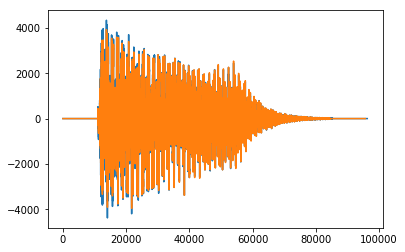

In [2]:

# -------------------------Get some insights and information about the training data-----------------------------


# Location of the wav file in the file system.
fileName1 = 'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/dataset/UMAPiano-DB-Poly-1/UMAPiano-DB-A0-NO-F.wav'
fileName2 = 'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/dataset/UMAPiano-DB-Poly-1/UMAPiano-DB-A0-NO-M.wav'
# Loads sample rate (bps) and signal data (wav). 
sample_rate1, data1 = scipy.io.wavfile.read(fileName1)
sample_rate2, data2 = scipy.io.wavfile.read(fileName2)


# Print in sdout the sample rate, number of items and duration in seconds of the wav file
print("Sample rate1 %s  data size1 %s  duration1: %s seconds"%(sample_rate1,data1.shape,len(data1)/sample_rate1))
print("Sample rate2 %s  data size2 %s  duration2: %s seconds"%(sample_rate2,data2.shape,len(data2)/sample_rate2))
print("DATA SIZES ARE DIFFERENT NEEDS TO BE CONSIDERED")
# Plot the wave file and get insight about the sample. Here we test first 100 samples of the wav file

# plt.plot(fileName_arr)
plt.plot(data1)
plt.plot(data2)
plt.show()




Max sized file is 356.wav
Minimum sized file is 722.wav
Maximum size 181718 
Minimum size 39224 
Dataset is in C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset and all the files are numbered
Sample rate3 44100  data size3 (181718,)  duration3: 4.120589569160998 seconds
Sample rate4 44100  data size4 (39224,)  duration4: 0.8894331065759638 seconds
Data sizes are different
0
0
0
0


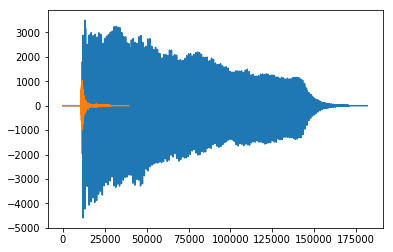

Safe to clip first 10000 sample points out from the array and convert them back to .wav file


In [3]:
"""
#---------------------------------------------------------------------------------------------------------------

# Split the data into train,validation and test 

dataset_path = 'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/dataset/UMAPiano-DB-Poly-1'
dir_list_len = len(os.listdir(dataset_path))
print("Number of files in the Dataset ",dir_list_len)
# training_data_arr = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]


# Change file names to be easily recognized


def change_filenames(dataset_path):
    
    i = 0  # Counter and target filename
    
    for old_name in os.listdir(dataset_path):
        # os.rename(dataset_path + "/" + old_name, dataset_path + "/" + str(i) + '.wav')
        os.rename(os.path.join(dataset_path, old_name), os.path.join(dataset_path, str(i) + '.wav'))
        i+=1    

change_filenames(dataset_new)
list_sizes_new =[]  

for data_new in os.listdir(dataset_new):
    _,data_new = scipy.io.wavfile.read(dataset_new+'/'+data_new)
    list_sizes_new.append(data_new.shape[0])
print("Maximum size %s and the music file is",np.argmax(list_sizes_new))
"""
dataset_new = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset'
list_sizes =[]  
for datas in os.listdir(dataset_new):
    _,data_new = scipy.io.wavfile.read(os.path.join(dataset_new,datas))
    list_sizes.append(data_new.shape[0])
    if data_new.shape[0]== 39224:
        print("Minimum sized file is",datas)
    if data_new.shape[0] == 181718:
        print("Max sized file is",datas)

print("Maximum size %s "%(max(list_sizes)))
print("Minimum size %s "%(min(list_sizes)))

print("Dataset is in C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset and all the files are numbered")

# -------------------------Get some insights and information about the max and min sized data-----------------------------

# Location of the wav file in the file system.
fileName3 = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset/356.wav'
fileName4 = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset/722.wav'
# Loads sample rate (bps) and signal data (wav). 
sample_rate3, data3 = scipy.io.wavfile.read(fileName3)
sample_rate4, data4 = scipy.io.wavfile.read(fileName4)


# Print in sdout the sample rate, number of items and duration in seconds of the wav file
print("Sample rate3 %s  data size3 %s  duration3: %s seconds"%(sample_rate3,data3.shape,len(data3)/sample_rate3))
print("Sample rate4 %s  data size4 %s  duration4: %s seconds"%(sample_rate4,data4.shape,len(data4)/sample_rate4))
print("Data sizes are different")
# Plot the wave file and get insight about the sample. Here we test first 100 samples of the wav file

# fileName_arr = np.fromfile(open(fileName),np.int16)[0:96270]

print(data3[10000])
print(data4[10000])
print(data3[180000])
print(data4[29000])


plt.plot(data3)
plt.plot(data4)
plt.show()

print("Safe to clip first 10000 sample points out from the array and convert them back to .wav file")

Sample rate 44100  data size (56293,)  duration: 1.2764852607709751 seconds


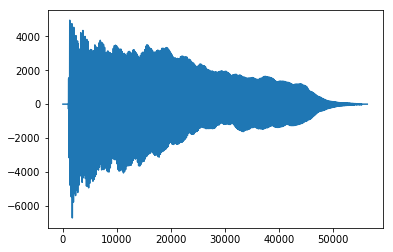

In [4]:
#----------------------- .WAV training data preprocessing steps ----------------------
import IPython

# Clip the first 10000 values which doesn't show any informations 
"""
def clip_write_wav(dataset_path):
    
    i = 0  # Counter and target filename
    
    for datas in os.listdir(dataset_path):
        
        _,data = scipy.io.wavfile.read(dataset_path+'/'+datas)
        data= data[:-10000]  # Slice out last 10000 elements in data
        data= data[10000:] # Slice out first 10000 elements in the data
        
        #IF ADD NOISE DO it here in the data which is an array.
        
        scipy.io.wavfile.write('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/%i.wav'%i, 44100, data) 
        
        i+=1 
        
    
 """

_dataset = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset'
_target = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data'
clip_points = 10000
_sampling_rate = 44100
# clip_write_wav(_dataset)


# Verify required informations again
sample_rate3, data3 = scipy.io.wavfile.read('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/3.wav')
print("Sample rate %s  data size %s  duration: %s seconds"%(sample_rate3,data3.shape,len(data3)/sample_rate3))
plt.plot(data3)
plt.show()

#Play the audio inline

IPython.display.Audio('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/3.wav')

# Reshape the data as square matrix of 310*310 of size 96100
# data = data.reshape(310,310)
# print("Reshaped data",np.shape(data))

# Repeat the steps for all files in the dataset
               


In [5]:
_dataset_new = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data'
_list_sizes =[]  
for datas in os.listdir(_dataset_new):
    _,_data_new = scipy.io.wavfile.read(os.path.join(_dataset_new,datas))
    _list_sizes.append(_data_new.shape[0])
    if _data_new.shape[0]== 19224:
        print("Minimum sized file is",datas)
    if _data_new.shape[0] == 161718:
        print("Max sized file is",datas)
# print(_list_sizes)
print("Maximum size %s "%(max(_list_sizes)))
print("Minimum size %s "%(min(_list_sizes)))
print("Notice that io read and write doesnt preserve the index of files in the directory")

Max sized file is 286.wav
Minimum sized file is 693.wav
Maximum size 161718 
Minimum size 19224 
Notice that io read and write doesnt preserve the index of files in the directory


In [19]:
# Upsample the data # 512x512 = 262144

target_folder = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data'

def write_wav(dataset_path,target_folder):
    
    i=0

    for datas in os.listdir(dataset_path):
        
        _,data = scipy.io.wavfile.read(dataset_path+'/'+datas)
        
        #IF ADD NOISE DO it here in the data which is an array.
        
        scipy.io.wavfile.write('%s/%i.wav'%(target_folder,i), 88000, data) 
        
        i+=1


write_wav(_dataset_new,target_folder)


Max sized file is 208.wav and sampling rate 88000
Minimum sized file is 660.wav and sampling rate 88000
Maximum size 161718 
Minimum size 19224 
Sample rate 88000  data size (49966,)  duration: 0.5677954545454545 seconds


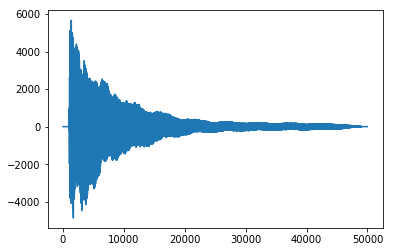

In [20]:
sampled_datapath ='C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data'
_list_sizes =[]  
for datas in os.listdir(sampled_datapath):
    sampling_rate,_data_new = scipy.io.wavfile.read(os.path.join(sampled_datapath,datas))
    _list_sizes.append(_data_new.shape[0])
    if _data_new.shape[0]== 19224:
        print("Minimum sized file is %s and sampling rate"%datas,sampling_rate)
    if _data_new.shape[0] == 161718:
        print("Max sized file is %s and sampling rate"%datas,sampling_rate)
# print(_list_sizes)
print("Maximum size %s "%(max(_list_sizes)))
print("Minimum size %s "%(min(_list_sizes)))


# Verify required informations again
sample_rate5, data5 = scipy.io.wavfile.read('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data/3.wav')
print("Sample rate %s  data size %s  duration: %s seconds"%(sample_rate5,data5.shape,len(data5)/sample_rate5))
plt.plot(data5)
plt.show()

#Play the audio inline

IPython.display.Audio('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/3.wav')

In [68]:
# Each audio file should have 262144 entries. Extend them all with zeros in the tail
# Convert all audio files as matrices of 512x512 shape

def get_training_data(dataset_path):
    
    training_data  = []
    
    for datas in os.listdir(dataset_path):
        
        _,data = scipy.io.wavfile.read(dataset_path+'/'+datas)
        # Add Zeros at the tail until 262144
        temp_zeros = [0]*262144
        # print("Unpadded data len",len(data))
        # print(len(temp_zeros))
        temp_zeros[:len(data)] = data  # Slice temp_zeros and add the data into the slice
        # print("Padded data len",len(temp_zeros))
        # print(np.shape(temp_zeros))
        # Reshape the data as square matrix of 403*403 of size 162409
        data_ = np.reshape(temp_zeros,(512,512))
        training_data.append(data_)
    
    return training_data

training_data = get_training_data('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data')

print(training_data[0].shape)

# Expand the dims # The third dimension represents number of channels

for i in range(len(training_data)):
    training_data[i] = training_data[i][:,:,np.newaxis]
print(training_data[0].shape)
   


(512, 512)
(512, 512, 1)


In [9]:
#Leaky relu function

def leaky_relu(x,alpha):
    return tf.nn.relu(x) - alpha * tf.nn.relu(-x)


In [33]:
# NETWORK ARCHITECTURE: BASELINE MODEL OF WAVENET


def convolution(inp, kernel_shape,_strides, bias_shape):
    
    """
        Args:
            inp(array) - Image or output from previous layer 
            weight_shape(list) = Filter shape [kernel_shape,num_fliters ] e.g (5,5,3,16) Convolution layer 1
            bias_shape(int) = Shape of bias corresponds to number of neurons
        Returns:
            output(array) - batch_norm(leaky_relu(convolution))
    
    """  
    
    # Initialize weight variable
    
    incoming = kernel_shape[0]*kernel_shape[1]*kernel_shape[2]  
    weight_init = tf.random_normal_initializer(stddev = (2.0/incoming)**0.5) 
    W = tf.get_variable("W", kernel_shape, initializer = weight_init)
    
    # Keep track of summary of weights for plot
    #if plot:    
        # tf.filter_summary(W, kernel_shape)
    
    # Initialize bias variable
    bias_init = tf.constant_initializer(value = 0)
    b = tf.get_variable("b", bias_shape, initializer = bias_init)
    
    # Convolve
    convolve = tf.nn.convolution(inp, W, strides = _strides, padding = 'SAME') 
    logits = tf.nn.bias_add(convolve,b)
    print(logits)
    print(tf.shape(logits))
    
    # Apply leaky_relu activation function
    _output = leaky_relu(logits,alpha = 0.1)
    
    output = tf.contrib.layers.batch_norm(_output)
    
    return output


def deconvolution(inp, kernel_shape,_strides, bias_shape):
    
    """
        Args:
            inp(array) - Image or output from previous layer 
            weight_shape(list) = Filter shape [kernel_shape,num_fliters ] e.g (5,5,3,16) Convolution layer 1
            bias_shape(int) = Shape of bias corresponds to number of neurons
        Returns:
            output(array) - batch_norm(leaky_relu(convolution))
    
    """  
    
    # Initialize weight variable
    
    incoming = kernel_shape[0]*kernel_shape[1]*kernel_shape[2]  
    weight_init = tf.random_normal_initializer(stddev = (2.0/incoming)**0.5) 
    W = tf.get_variable("W", kernel_shape, initializer = weight_init)
    
    # Keep track of summary of weights for plot
    #if plot:    
        # tf.filter_summary(W, kernel_shape)
    
    # Initialize bias variable
    bias_init = tf.constant_initializer(value = 0)
    b = tf.get_variable("b", bias_shape, initializer = bias_init)
    
    # OUtput shape since Padding is SAME
    inp_shape = tf.shape(inp)
    n_filters = kernel_shape[3]
    stride_h = _strides[1]
    stride_w = _strides[2]
    out_h = inp_shape[1] * stride_h
    out_w = inp_shape[2] * stride_w
    
    _output_shape = tf.stack([inp_shape[0],out_h,out_w,n_filters])
    # Deconvolve
    convolve_T = tf.layers.conv2d_transpose(inp, 
                                            n_filters, 
                                            kernel_size = [kernel_shape[0],kernel_shape[1]],
                                            strides = (_strides[1],_strides[2]),
                                            #use_bias = True,
                                            #bias_initializer = bias_init,
                                            padding = 'SAME')
    # convolve_T = tf.nn.conv2d_transpose(inp, kernel_shape, strides = _strides, output_shape = _output_shape, padding = 'SAME') 
    logits = tf.nn.bias_add(convolve_T,b)
    print(logits)
    print(tf.shape(logits))
    
    # Apply leaky_relu activation function
    _output = leaky_relu(logits,alpha = 0.1)
    
    output = tf.contrib.layers.batch_norm(_output)
    
    return output



In [41]:
# ---------------------------Build the network using helper function--------------------------

def cnn_encoder(inp):
    
    # Flatten the input image
    inp = tf.reshape(inp, shape=[-1,512,512,1])
    
    # Scope variables that operates along with tf.get_variable
    print("Downsampling...")
    #Layer 1
    with tf.variable_scope("conv1"):
        conv1 = convolution(inp,kernel_shape = [5,5,1,128],_strides = [2,2], bias_shape = [128])
        print(conv1)
    # Layer 2
    with tf.variable_scope("conv2"):
        conv2 = convolution(conv1, kernel_shape = [4,4,128,128],_strides = [2,2], bias_shape = [128])
        print(conv2)
    # Layer 3
    with tf.variable_scope("conv3"):
        conv3 = convolution(conv2,kernel_shape = [4,4,128,128],_strides = [2,2], bias_shape = [128])
        print(conv3)
    # Layer 4
    with tf.variable_scope("conv4"):
        conv4 = convolution(conv3, kernel_shape = [4,4,128,256],_strides = [2,2], bias_shape = [256])
        print(conv4)
    # Layer 5
    with tf.variable_scope("conv5"):
        conv5 = convolution(conv4, kernel_shape = [4,4,256,256],_strides = [2,2], bias_shape = [256])
        print(conv5)
    # Layer 6
    with tf.variable_scope("conv6"):
        conv6 = convolution(conv5, kernel_shape = [4,4,256,256],_strides = [2,2], bias_shape = [256])
        print(conv6)
    # Layer 7
    with tf.variable_scope("conv7"):
        conv7 = convolution(conv6,kernel_shape = [4,4,256,512],_strides = [2,2], bias_shape = [512])
        print(conv7)
    # Layer 8
    with tf.variable_scope("conv8"):
        conv8 = convolution(conv7, kernel_shape = [4,4,512,512],_strides = [2,2], bias_shape = [512])
        print(conv8)
    # Layer 9
    with tf.variable_scope("conv9"):
        conv9 = convolution(conv8, kernel_shape = [4,4,512,512],_strides = [2,1], bias_shape = [512])
        print(conv9)
    # Layer 10
    with tf.variable_scope("conv10"):
        conv10 = convolution(conv9, kernel_shape = [1,1,512,1024],_strides = [1,1], bias_shape = [1024])
        print(conv10)
        
    return conv10



In [42]:
def concatenate(encoder,inp):
    return None

In [43]:
# ---------------------------Build the network using helper function--------------------------

def cnn_decoder(inp):
    

    # Scope variables that operates along with tf.get_variable
    
    #Layer 1
    print("Upsampling...")
    with tf.name_scope('deconv1') as scope:
        deconv1 = deconvolution(inp, kernel_shape = [1,1,1024,1024],_strides = [1,1,1,1], bias_shape = [1024])
        print(deconv1)
    # Layer 2
    with tf.variable_scope("deconv2"):
        deconv2 = deconvolution(deconv1, kernel_shape = [4,4,1024,512],_strides = [1,2,2,1], bias_shape = [512])
        print(deconv2)
    # Layer 3
    with tf.variable_scope("deconv3"):
        deconv3 = deconvolution(deconv2,kernel_shape = [4,4,512,512],_strides = [1,2,2,1], bias_shape = [512])
        print(deconv3)
    # Layer 4
    with tf.variable_scope("deconv4"):
        deconv4 = deconvolution(deconv3, kernel_shape = [4,4,512,256],_strides = [1,2,2,1], bias_shape = [256])
        print(deconv4)
    # Layer 5
    with tf.variable_scope("deconv5"):
        deconv5 = deconvolution(deconv4, kernel_shape = [4,4,256,256],_strides = [1,2,2,1], bias_shape = [256])
        print(deconv5)
    # Layer 6
    with tf.variable_scope("deconv6"):
        deconv6 = deconvolution(deconv5, kernel_shape = [4,4,256,256],_strides = [1,2,2,1], bias_shape = [256])
        print(deconv6)
    # Layer 7
    with tf.variable_scope("deconv7"):
        deconv7 = deconvolution(deconv6,kernel_shape = [4,4,256,128],_strides = [1,2,2,1], bias_shape = [128])
        print(deconv7)
    # Layer 8
    with tf.variable_scope("deconv8"):
        deconv8 = deconvolution(deconv7, kernel_shape = [4,4,128,128],_strides = [1,2,2,1], bias_shape = [128])
        print(deconv8)
    # Layer 9
    with tf.variable_scope("deconv9"):
        deconv9 = deconvolution(deconv8, kernel_shape = [5,5,128,128],_strides = [1,2,2,1], bias_shape = [128])
        print(deconv9)
    # Layer 10
    with tf.variable_scope("deconv10"):
        deconv10 = deconvolution(deconv9, kernel_shape = [5,5,128,128],_strides = [1,2,1,1], bias_shape = [128])
        print(deconv10)

    
    return deconv10

In [57]:
# -------------------------------Compute Loss, Optimize the error and evaluate the model ---------------------------

def loss(output, y):
    
    # Calculate mean cross entropy for each instance of mini-batch
    mse = tf.div(tf.reduce_mean(tf.square(tf.subtract(output, y))),2)
    
    # Calculate mean cross entropy for the mini-batch
    mean_cross_entropy = tf.reduce_mean(mse)
    
    return mean_cross_entropy
    
def optimize(loss, _momentum = False, _adam = False):
    
    if _momentum:
        optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    if _adam:
        optimizer = tf.train.AdamOptimizer(learning_rate, beta1, beta2,epsilon,use_locking = False, name = 'Adam')
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    print("Loss",loss)
    
    return training_op


def evaluate(output, y):
    prediction_error = tf.div(tf.reduce_mean(tf.square(tf.subtract(output, y))),2)
    accuracy = tf.reduce_mean(prediction_error)
    
    return accuracy

In [69]:
tf.reset_default_graph() 
#-------------------------------Train the network-------------------------------------------

aud_size = 512
num_channels = 1
#Placeholder for input audio array
# Shape is set to "None" since it may hold arbitrary number of audios
x = tf.placeholder(tf.float32, shape=[None, aud_size, aud_size, num_channels], name='x') 


#Placeholder for target audio array
# Holds arbitrary number of  targets
y = tf.placeholder(tf.float32, shape=[None,aud_size,aud_size,num_channels], name='y') 


# Hyperparameters

learning_rate = 0.01
num_epochs = 1
batch_size = 1
total_batches = 300
momentum = 0.9     # Momentum based optimization parameter
beta1,beta2,epsilon = 0.9,0.999,1e-08   # Adam optimizer parameters

# -------------------------------------------Training Cycle---------------------------------------------------

training_step = tf.Variable(0, name = 'training_step')

encoder = cnn_encoder(x)

output = cnn_decoder(encoder)
cost = loss(output, y)
training_op = optimize(cost,_momentum= False)
# evaluation_op = evaluate(output, y)
validate_step = 1

#Plot variables

training_loss,validation_accuracy = [],[]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # total_avg_cost = []
    for epoch in range(num_epochs):

        avg_cost = 0

        # Loop over all batches

        for i in range(total_batches):
            
            # print("Batch %s  of %s" %(i, total_batches))
            # Get random data from training_data 
            train_idx = np.random.randint(0,len(training_data)-1)
            train_data = training_data[train_idx]
            train_data = np.expand_dims(train_data,axis = 0)
            # train_data = array(train_data).reshape(1,512,512,1)
            minibatch_x, minibatch_y = train_data,train_data

            # Fit training using batch data
            feed_dict = {x:minibatch_x, y:minibatch_y}
            sess.run(training_op, feed_dict = feed_dict)

            # Compute loss
            _cost = sess.run(cost, feed_dict = feed_dict)
            training_loss.append(_cost)
            avg_cost +=_cost/total_batches
            
        # total_avg_cost.append(avg_cost)
        
        # print("Average training cost",avg_cost)
        
        # Display logs per epoch step

        if epoch %validate_step == 0:
            val_idx = np.random.randint(0,len(training_data)-1)
            val_data = training_data[val_idx]
            val_data = np.expand_dims(val_data[val_idx],axis = 0)
            val_batch_x,val_batch_y = val_data,val_data
            val_feed_dict = {x: val_batch_x, y: val_batch_y}
            _accuracy = sess.run(evaluation_op,feed_dict=val_feed_dict)
            validation_accuracy.append(_accuracy)       
            print("Validation Error:", (1- _accuracy))


    print("-----------------------Gradient Descent Optimization finished-----------------------------")
    # print("Average training cost ",np.sum(total_avg_cost)/num_epochs)
    # print("Average validation accuracy",np.sum(validation_accuracy)/num_epochs)
        

    # ---------------------------------Test Model----------------------------------------
    # HAS TO BE PERFORMED IN DATA which the model has never seen during training or validation
    
    test_idx = np.random.randint(0,len(training_data)-1)
    test_data = training_data[test_idx]
    test_data = np.expand_dims(test_data[test_idx],axis = 0)
    test_batch_x,test_batch_y = test_data,test_data
    test_feed_dict = {x: test_batch_x, y: test_batch_y}
    accuracy = sess.run(evaluation_op, feed_dict = test_feed_dict)

    print("Test accuracy:", accuracy)

Downsampling...
Tensor("conv1/BiasAdd:0", shape=(?, 256, 256, 128), dtype=float32)
Tensor("conv1/Shape:0", shape=(4,), dtype=int32)
Tensor("conv1/BatchNorm/batchnorm/add_1:0", shape=(?, 256, 256, 128), dtype=float32)
Tensor("conv2/BiasAdd:0", shape=(?, 128, 128, 128), dtype=float32)
Tensor("conv2/Shape:0", shape=(4,), dtype=int32)
Tensor("conv2/BatchNorm/batchnorm/add_1:0", shape=(?, 128, 128, 128), dtype=float32)
Tensor("conv3/BiasAdd:0", shape=(?, 64, 64, 128), dtype=float32)
Tensor("conv3/Shape:0", shape=(4,), dtype=int32)
Tensor("conv3/BatchNorm/batchnorm/add_1:0", shape=(?, 64, 64, 128), dtype=float32)
Tensor("conv4/BiasAdd:0", shape=(?, 32, 32, 256), dtype=float32)
Tensor("conv4/Shape:0", shape=(4,), dtype=int32)
Tensor("conv4/BatchNorm/batchnorm/add_1:0", shape=(?, 32, 32, 256), dtype=float32)
Tensor("conv5/BiasAdd:0", shape=(?, 16, 16, 256), dtype=float32)
Tensor("conv5/Shape:0", shape=(4,), dtype=int32)
Tensor("conv5/BatchNorm/batchnorm/add_1:0", shape=(?, 16, 16, 256), dtype=

ResourceExhaustedError: OOM when allocating tensor with shape[1,131072,3200]
	 [[Node: deconv10/conv2d_transpose/conv2d_transpose_2 = Conv2DBackpropInput[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 2, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/cpu:0"](deconv10/conv2d_transpose/stack, deconv10/conv2d_transpose/kernel/read, deconv9/BatchNorm/batchnorm/add_1)]]

Caused by op 'deconv10/conv2d_transpose/conv2d_transpose_2', defined at:
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-f7e32319704e>", line 31, in <module>
    output = cnn_decoder(encoder)
  File "<ipython-input-43-410942ef2899>", line 47, in cnn_decoder
    deconv10 = deconvolution(deconv9, kernel_shape = [5,5,128,128],_strides = [1,2,1,1], bias_shape = [128])
  File "<ipython-input-33-189ad638e758>", line 86, in deconvolution
    padding = 'SAME')
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\layers\convolutional.py", line 1282, in conv2d_transpose
    return layer.apply(inputs)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\layers\base.py", line 492, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\layers\base.py", line 441, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\layers\convolutional.py", line 1162, in call
    data_format=utils.convert_data_format(self.data_format, ndim=4))
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1046, in conv2d_transpose
    name=name)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 488, in conv2d_backprop_input
    data_format=data_format, name=name)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "c:\users\saran\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,131072,3200]
	 [[Node: deconv10/conv2d_transpose/conv2d_transpose_2 = Conv2DBackpropInput[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 2, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/cpu:0"](deconv10/conv2d_transpose/stack, deconv10/conv2d_transpose/kernel/read, deconv9/BatchNorm/batchnorm/add_1)]]
